In [22]:
%matplotlib inline
import plotting_Boyle as plt_B
reload(plt_B)
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
from read_model_ID import unpack_parameters
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);
import plotting_Boyle as plt_B
reload(plt_B)
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

import analysis_SA_fits as SAfits
reload(SAfits);

import Boyle_data_processing as Bdata
reload(Bdata);

import read_model_ID;
reload(read_model_ID);

import Weighted_Average as WA
reload(WA)

import coarsegrained_Model as cg
reload(cg)

data_folder = '../data/22_3_2019/'

In [3]:
simset = []
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,101):
    sa = pd.read_csv(data_folder + 'fit_22_3_2019_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = data_folder + 'fit_22_3_2019_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    

    
    
best_fit = simset[np.argmin(chi_squared)]
best_fit

'../data/22_3_2019/fit_22_3_2019_sim_13.txt'

## Best Fit

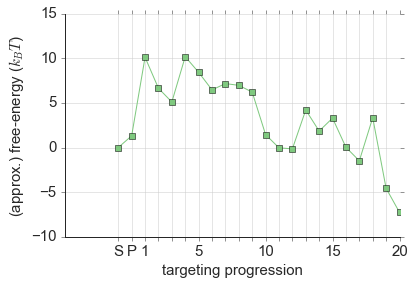

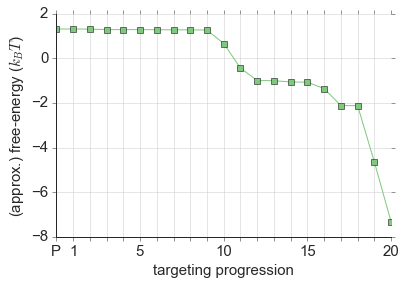

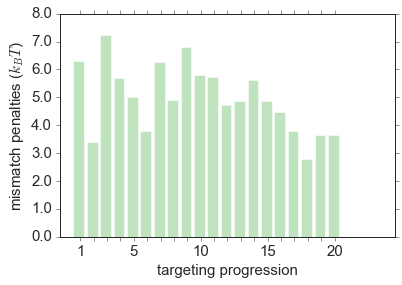

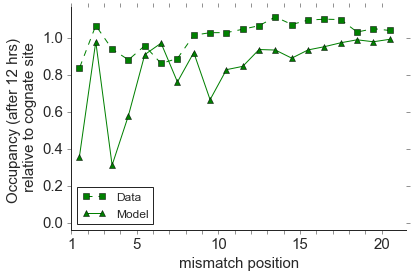

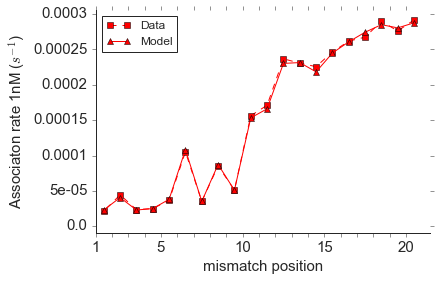

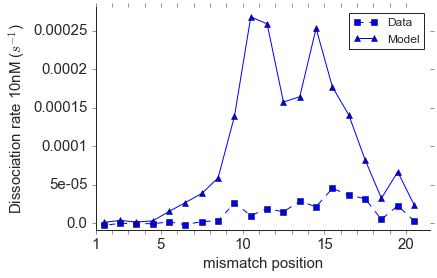

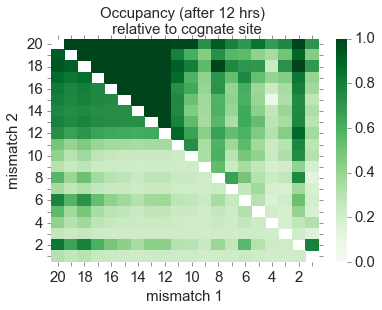

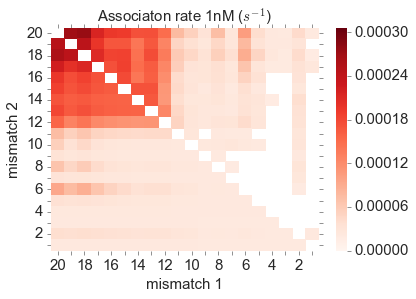

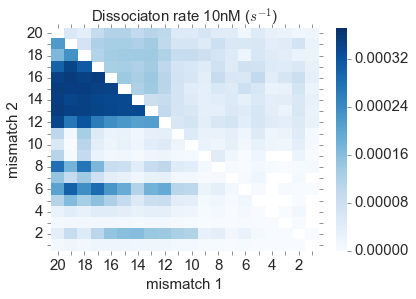

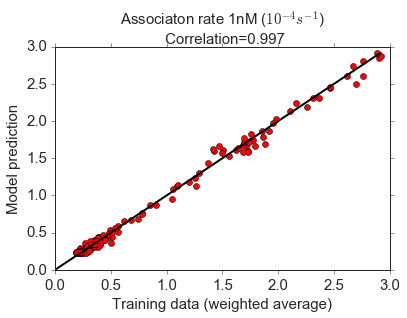

In [24]:
model_id = 'general_energies_no_kPR'
# filename = simset[np.argsort(chi_squared)[3]]
filename = best_fit
Nparams = 43
parameters = plt_B.load_simm_anneal(filename, Nparams)




Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)


Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id);

plt.figure()
FreeEnergy.plot_mismatch_penalties(parameters, model_id)


plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')

plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_on ,kind='OnRate')

plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
_,_ = plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')

plt.figure()
best_model,_ = plt_B.plot_heatmap(Model_on ,kind='OnRate')

plt.figure()
_,_ = plt_B.plot_heatmap(Model_off ,kind='OffRate')

plt.figure()
_,_,_ = WA.predict_train(parameters)

## Selection (scores are calculated based n the weighted avarage of the data)

In [5]:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset,percentage=0.1)

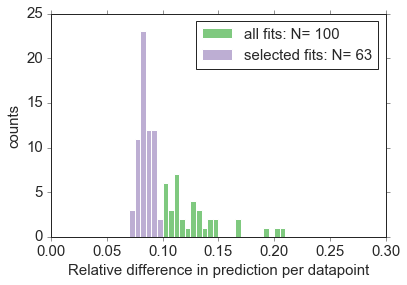

In [6]:
plt.hist(scores, normed=False, bins=np.arange(0,np.max(scores),0.005), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,np.max(scores),0.005), label='selected fits: N= ' +str(len(selected_scores)));
plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

In [7]:
print 'selected simulations:'
np.array(map(lambda x: int((x.split('_')[-1]).split('.')[0]), selected_sims))

selected simulations:


array([  1,   4,   5,   6,   7,   9,  10,  11,  12,  13,  15,  17,  18,
        19,  21,  22,  24,  26,  27,  30,  31,  33,  35,  39,  43,  47,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  62,  63,
        64,  65,  67,  68,  69,  70,  71,  73,  75,  76,  79,  80,  81,
        82,  83,  84,  86,  87,  90,  91,  92,  97,  99, 100])

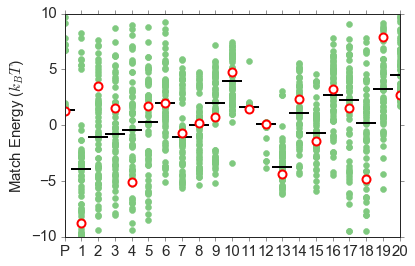

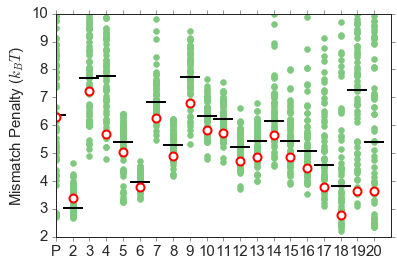

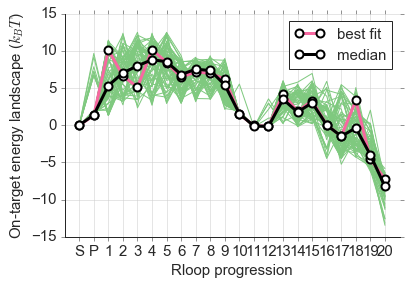

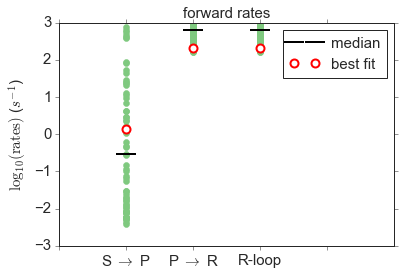

In [8]:
# --- make selection --- 
simset = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset,
                                                                                        Nparams=43,
                                                                                        model_id=model_id)
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]

# ---- show fluctuations in parameter sets --- 

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)

plt.figure()

for sim in simset:
    y = list(matches.loc[sim])
    x = range(len(y))
    plt.plot(x,y, marker='o',markersize=6,linestyle='', color=sns.color_palette()[0],mec=sns.color_palette()[0], alpha=1.0,label='')

y = list(matches.median())
x = range(len(y))
plt.plot(x,y,color='black',linestyle='',marker='_',lw=4,markersize =20,markeredgewidth= 2,label='median')

y = list(matches.loc[best_fit])
x = range(len(y))
plt.plot(x, y, color='#f768a1',linestyle='',marker='o', markersize =8,markerfacecolor='white', mec='r',markeredgewidth= 2,label='best fit')

ax=plt.gca()
ax.set_xticks(x)
labels = np.array(matches.columns)
labels[0]='P'
ax.set_xticklabels(labels, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Match Energy ($k_BT$)',fontsize=15);

# --- Mismatches ---
plt.figure()

for sim in simset:
    y = list(mismatches.loc[sim])
    x = range(len(y))
    plt.plot(x,y, marker='o',markersize=6,linestyle='', color=sns.color_palette()[0],mec=sns.color_palette()[0], alpha=1.0,label='')

y = list(mismatches.median())
x = range(len(y))
plt.plot(x,y,color='black',linestyle='',marker='_',lw=4,markersize =20,markeredgewidth= 2,label='median')

y = list(mismatches.loc[best_fit])
x = range(len(y))
plt.plot(x, y, color='#f768a1',linestyle='',marker='o', markersize =8,markerfacecolor='white', mec='r',markeredgewidth= 2,label='best fit')

ax=plt.gca()
ax.set_xticks(x)
labels = np.array(mismatches.columns)
labels[0]='P'
ax.set_xticklabels(labels, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Mismatch Penalty ($k_BT$)',fontsize=15);

# --- (microscopic) free-energy landscape --- 
plt.figure()
for filename in simset:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit] )

plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
             marker='o',
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(range(0,22),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Rloop progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();

# --- 10log of the forward rates --- 
plt.figure()

x=range(3)

for sim in simset:
    y = list(forward_rates.loc[sim].apply(np.log10))
    plt.plot(x,y,marker='o',markersize=6,linestyle='',mec=sns.color_palette()[0], color=sns.color_palette()[0], alpha=1.0,label='')

y = list(forward_rates.median().apply(np.log10))
plt.plot(x,y,color='black',linestyle='',marker='_',lw=4,markersize =20,markeredgewidth=2,label='median') 

y = list(forward_rates.loc[best_fit].apply(np.log10))
plt.plot(x,y,color='#f768a1',linestyle='',marker='o', lw=3,markersize =8,markerfacecolor='white',mec='r',markeredgewidth= 2,label='best fit')

plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


## Coarse-grained Model

In [18]:
filename = best_fit
Nparams = 43
parameters = plt_B.load_simm_anneal(filename, Nparams)

score:
0.0788589104017


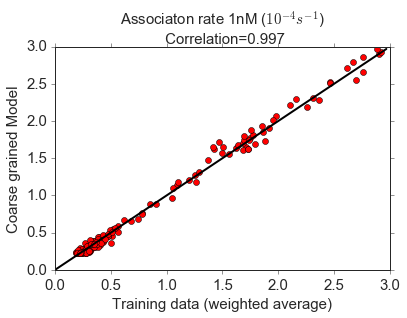

In [23]:
k_on_mat, k_R_mat, k_UB_mat = cg.predict_coarsegrained_Model(parameters)
score,_,_ = cg.correlation_coarsegrained_Model(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True)
print 'score:'
print score

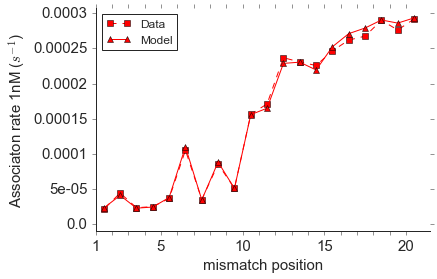

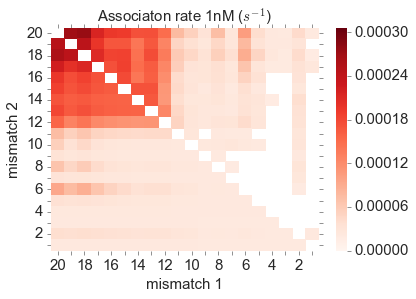

In [20]:
plt.figure()
_,_ = plt_B.plot_single_mismatches(k_on_mat ,kind='OnRate')
plt.figure()
_,_ = plt_B.plot_heatmap(Model_on ,kind='OnRate')


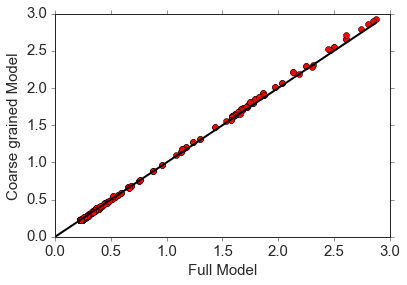

In [39]:
ymax = np.max(best_model*10**4)
plt.plot(best_model* 10 ** 4, k_on_mat* 10 ** 4, 'ro');
plt.plot([0.0, ymax], [0.0, ymax], 'k', lw=2)
#plt.title('Associaton rate 1nM ($10^{-4} s^{-1}$)\n Correlation='+str(float(round(1000*corr))/1000), fontsize=15)
plt.xlabel('Full Model', fontsize=15)
plt.ylabel('Coarse grained Model', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);